In [61]:
import pandas as pd
df=pd.read_csv('salaries.csv')


In [62]:
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


<Axes: xlabel='company'>

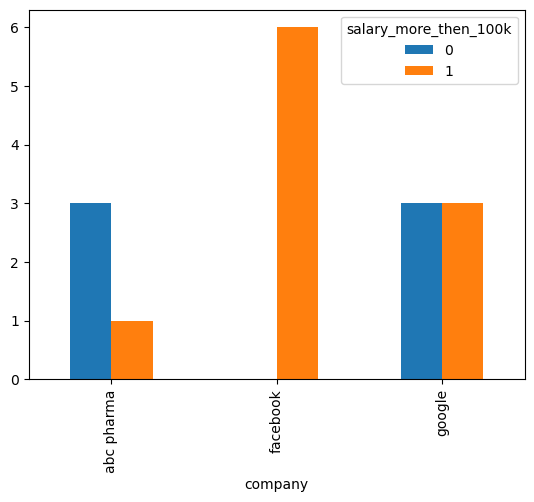

In [63]:
pd.crosstab(df['company'],df['salary_more_then_100k']).plot(kind='bar')           #1-->retained person

<Axes: xlabel='job'>

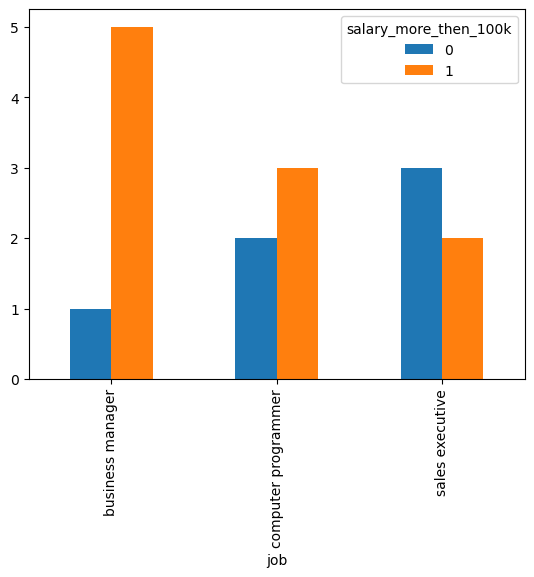

In [64]:
pd.crosstab(df['job'],df['salary_more_then_100k']).plot(kind='bar')

<Axes: xlabel='degree'>

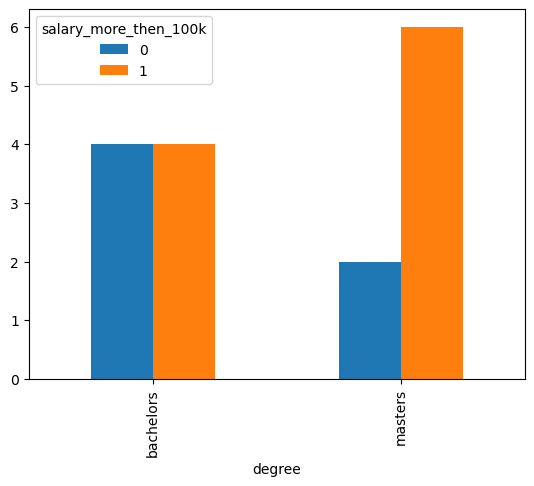

In [65]:
pd.crosstab(df['degree'],df['salary_more_then_100k']).plot(kind='bar')

In [66]:
df=df.replace({'google':0,'abc pharma':1,'facebook':2})
df=df.replace({'bachelors':0,'masters':1})
df=df.replace({'sales executive':0,'business manager':1,'computer programmer':2})

In [67]:
df


,company,job,degree,salary_more_then_100k
0,0,0,0,0
1,0,0,1,0
2,0,1,0,1
3,0,1,1,1
4,0,2,0,0
5,0,2,1,1
6,1,0,1,0
7,1,2,0,0
8,1,1,0,0
9,1,1,1,1


In [68]:
from sklearn.linear_model import LogisticRegression

X=df.drop(columns=['salary_more_then_100k'])
Y=df['salary_more_then_100k']

In [69]:
X

,company,job,degree
0,0,0,0
1,0,0,1
2,0,1,0
3,0,1,1
4,0,2,0
5,0,2,1
6,1,0,1
7,1,2,0
8,1,1,0
9,1,1,1


In [70]:
Y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [71]:
model=LogisticRegression()
model.fit(X,Y)

LogisticRegression()

In [72]:
ans=model.predict([[1,1,1]])
ans

C:\Users\shagu\anaconda1\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [73]:
model.score(X,Y)

0.75

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [75]:
model1=LogisticRegression()

In [76]:
model.score(X_train,Y_train)

0.7142857142857143